In [179]:
import pandas as pd
df = pd.read_csv('/Users/raymondlei/Documents/sem5/AppliedResearch/Project/FinalReport/coquitlam.csv')

In [180]:
df.info

<bound method DataFrame.info of                 時間戳記 How long have you been a resident of Coquitlam?      Age  \
0    2024/7/12 11:48                                    3 to 5 years      <25   
1    2024/7/12 14:16                                    1 to 2 years      <25   
2    2024/7/13 16:04                                    Over 5 years  25 - 44   
3    2024/7/13 16:15                                Less than 1 year  25 - 44   
4    2024/7/13 16:25                                    Over 5 years      <25   
..               ...                                             ...      ...   
381  2024/7/13 18:28                                    3 to 5 years  25 - 44   
382  2024/7/13 17:01                                    Over 5 years  25 - 44   
383   2024/7/15 9:30                                    3 to 5 years      <25   
384  2024/7/13 17:38                                    3 to 5 years  25 - 44   
385  2024/7/13 16:04                                    Over 5 years  25 - 44

In [181]:
import matplotlib.pyplot as plt

In [182]:
df = pd.DataFrame(df) 

In [183]:
print("Column names:")
print(df.columns)

Column names:
Index(['時間戳記', 'How long have you been a resident of Coquitlam?', 'Age',
       'Gender', 'Employment Status', 'Annual Household Income',
       'Residency status', 'Education Level',
       'Have you ever used any of the following smart online initiatives implemented by Coquitlam?',
       'Have you chosen one or more smart initiatives in section 2?',
       'How satisfied are you with the online eServices (such as finding job on career.coquitlam.ca, shelter donation, renewing dog license, and utility bill payment)?',
       'How would you rate the ease-of-use access bill histories, property tax, utilities, and dog licenses through myCoquitlam website?',
       'Do you find the Curbside Collection mobile app’s features to be comprehensive and useful?  ',
       'How responsive do you find the Let’s Talk Coquitlam website when providing feedback or participating in community discussions?  ',
       'Do you feel that the free Wi-Fi provided in Coquitlam’s City parks and ci

In [184]:
privacy_ratings1 = df.iloc[:, 15]

In [185]:
privacy_ratings1 = privacy_ratings1.fillna(0)

In [186]:
privacy_ratings1 = privacy_ratings1[privacy_ratings1 != 0]

In [187]:
privacy_ratings1 = privacy_ratings1.astype(int)

In [188]:
rating_counts1 = privacy_ratings1.value_counts().sort_index()

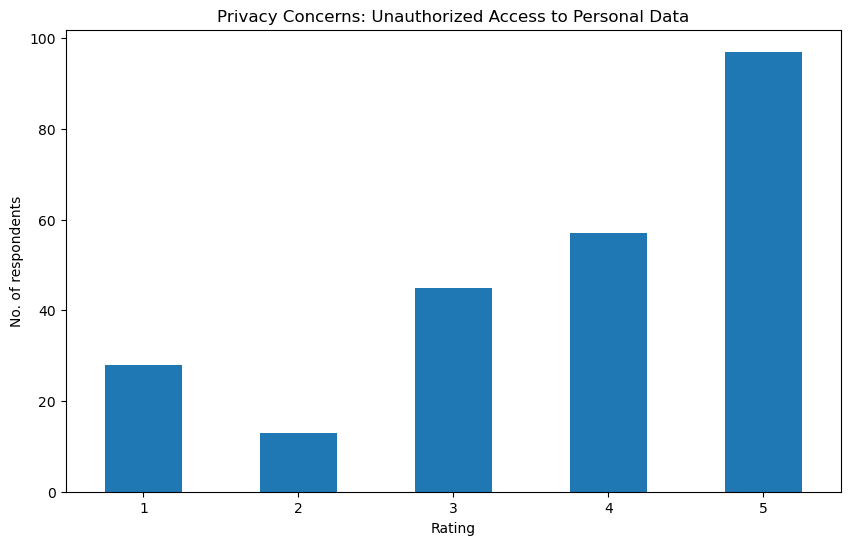

In [189]:
plt.figure(figsize=(10,6))
rating_counts1.plot(kind='bar')
plt.title('Privacy Concerns: Unauthorized Access to Personal Data')
plt.xlabel('Rating')
plt.ylabel('No. of respondents')
plt.xticks(rotation=0)
plt.show()

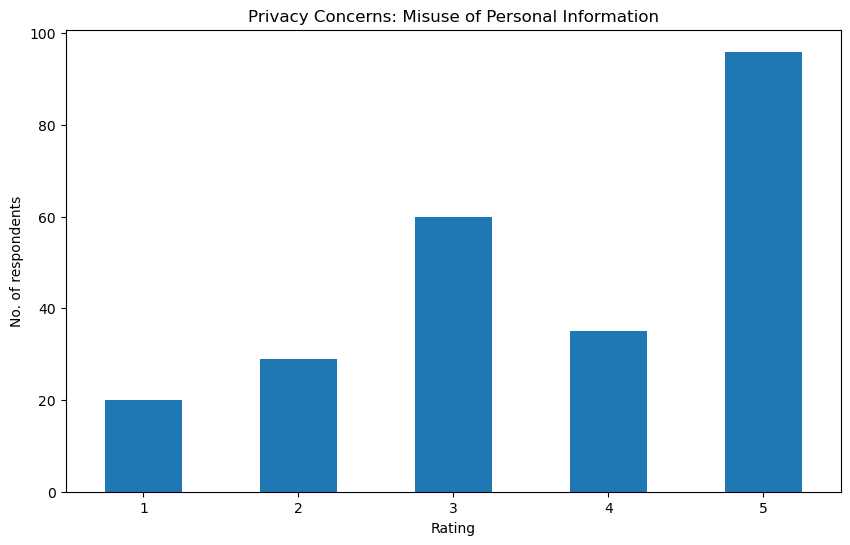

In [190]:
privacy_ratings2 = df.iloc[:, 16]
privacy_ratings2 = privacy_ratings2.fillna(0)
privacy_ratings2 = privacy_ratings2[privacy_ratings2 != 0]
privacy_ratings2 = privacy_ratings2.astype(int)
rating_counts2 = privacy_ratings2.value_counts().sort_index()
plt.figure(figsize=(10,6))
rating_counts2.plot(kind='bar')

plt.title('Privacy Concerns: Misuse of Personal Information')
plt.xlabel('Rating')
plt.ylabel('No. of respondents')
plt.xticks(rotation=0)
plt.show()

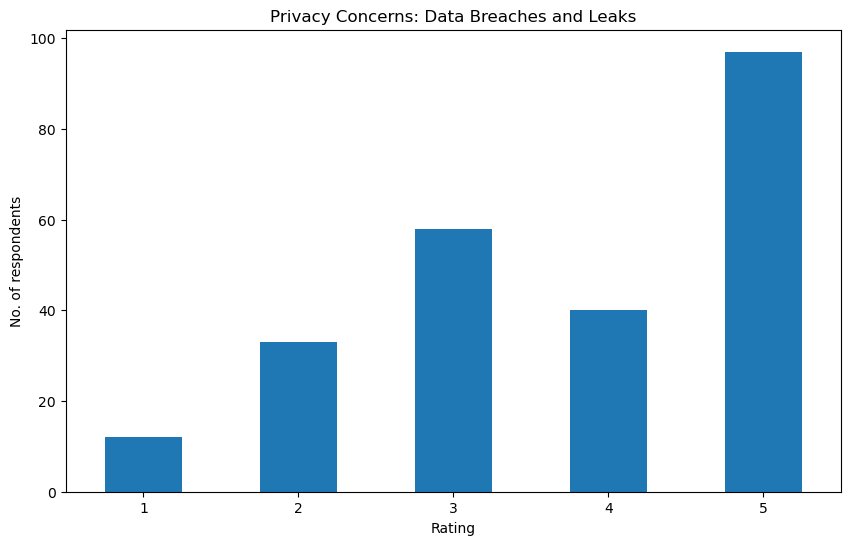

In [191]:
privacy_ratings3 = df.iloc[:, 17]
privacy_ratings3 = privacy_ratings3.fillna(0)
privacy_ratings3 = privacy_ratings3[privacy_ratings3 != 0]
privacy_ratings3 = privacy_ratings3.astype(int)
rating_counts3 = privacy_ratings3.value_counts().sort_index()
plt.figure(figsize=(10,6))
rating_counts3.plot(kind='bar')

plt.title('Privacy Concerns: Data Breaches and Leaks')
plt.xlabel('Rating')
plt.ylabel('No. of respondents')
plt.xticks(rotation=0)
plt.show()

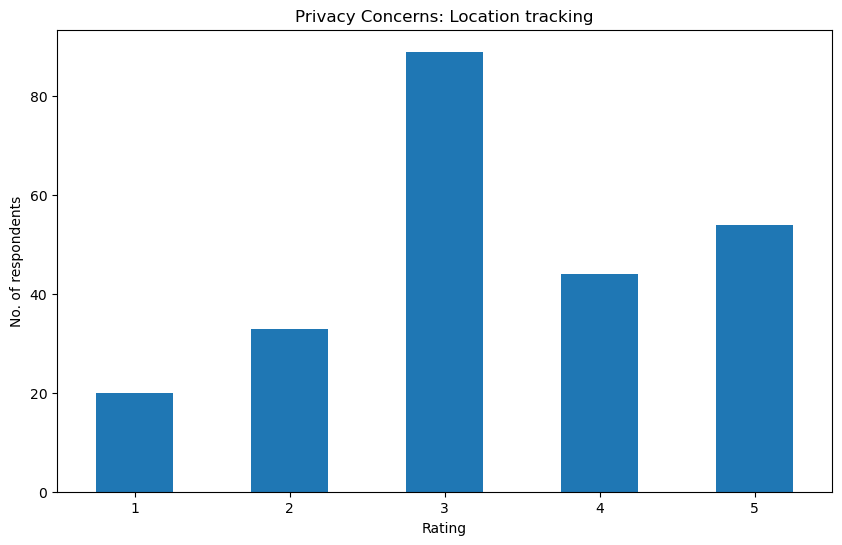

In [192]:
privacy_ratings4 = df.iloc[:, 18]
privacy_ratings4 = privacy_ratings4.fillna(0)
privacy_ratings4 = privacy_ratings4[privacy_ratings4 != 0]
privacy_ratings4 = privacy_ratings4.astype(int)
rating_counts4 = privacy_ratings4.value_counts().sort_index()
plt.figure(figsize=(10,6))
rating_counts4.plot(kind='bar')

plt.title('Privacy Concerns: Location tracking')
plt.xlabel('Rating')
plt.ylabel('No. of respondents')
plt.xticks(rotation=0)
plt.show()

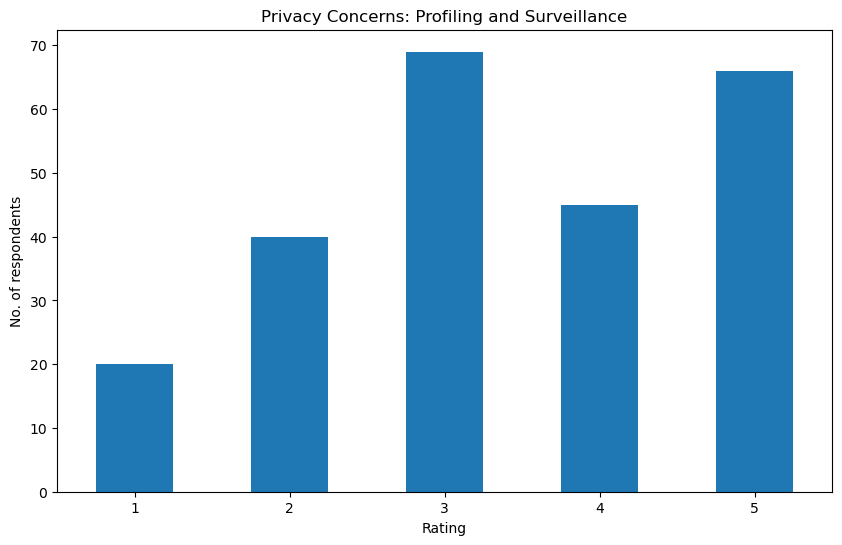

In [193]:
privacy_ratings5 = df.iloc[:, 19]
privacy_ratings5 = privacy_ratings5.fillna(0)
privacy_ratings5 = privacy_ratings5[privacy_ratings5 != 0]
privacy_ratings5 = privacy_ratings5.astype(int)
rating_counts5 = privacy_ratings5.value_counts().sort_index()
plt.figure(figsize=(10,6))
rating_counts5.plot(kind='bar')

plt.title('Privacy Concerns: Profiling and Surveillance')
plt.xlabel('Rating')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

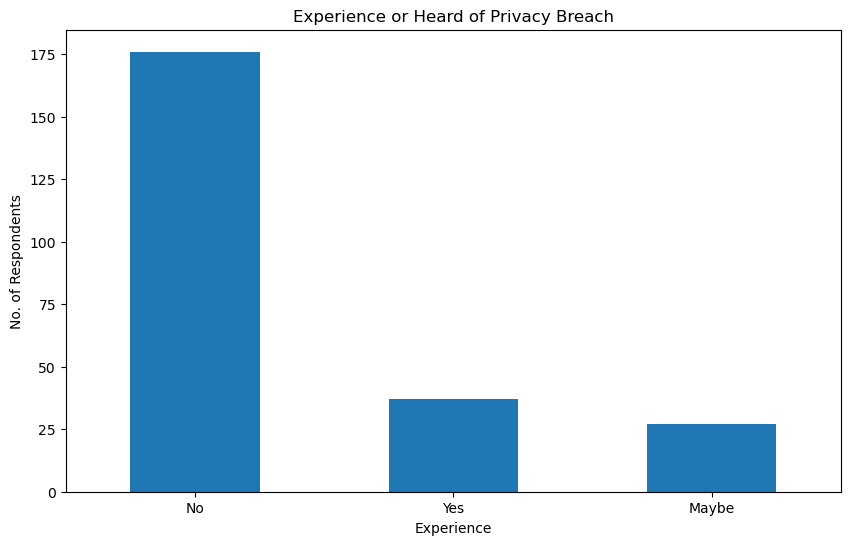

In [234]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'Have you ever experienced or heard of a privacy breach related to smart applications in Coquitlam?'
respond_counts = df[r].value_counts()
respond = ['Yes', 'No', 'Maybe']
yes = respond_counts['Yes']
no = respond_counts['No']
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Experience or Heard of Privacy Breach')
plt.xlabel('Experience')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

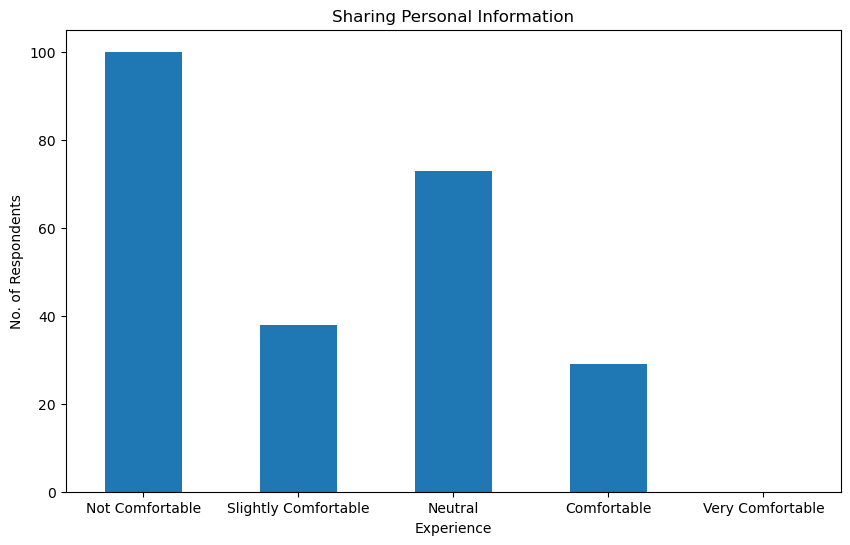

In [231]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'How comfortable are you with sharing personal information (e.g., location, health data)  with smart applications to access smart city services?'
respond_counts = df[r].value_counts()
respond = ['Not Comfortable', 'Slightly Comfortable', 'Neutral', 'Comfortable', 'Very Comfortable']
# Not_Comfortable = respond_counts['Not Comfortable']
# Slightly_Comfortable  = respond_counts['Slightly Comfortable']
# Neutral = respond_counts['Neutral']
# Comfortable = respond_counts['Comfortable']
# Very_Comfortable = respond_counts['Very Comfortable']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Sharing Personal Information')
plt.xlabel('Experience')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

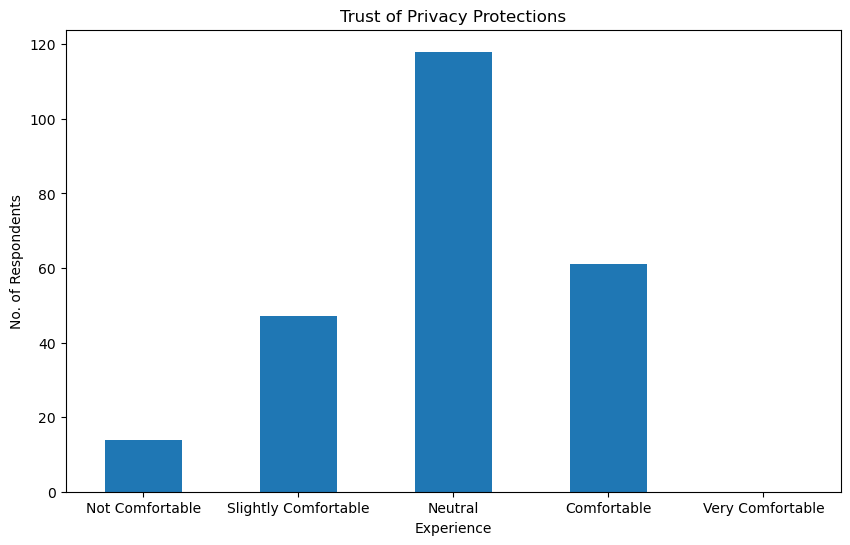

In [230]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'To what extent do you trust the city of Coquitlam and service providers to protect your privacy when using smart applications?'
respond_counts = df[r].value_counts()
respond = ['Not Comfortable', 'Slightly Comfortable', 'Neutral', 'Comfortable', 'Very Comfortable']
# Not_Comfortable = respond_counts['Not Comfortable']
# Slightly_Comfortable  = respond_counts['Slightly Comfortable']
# Neutral = respond_counts['Neutral']
# Comfortable = respond_counts['Comfortable']
# Very_Comfortable = respond_counts['Very Comfortable']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Trust of Privacy Protections')
plt.xlabel('Experience')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

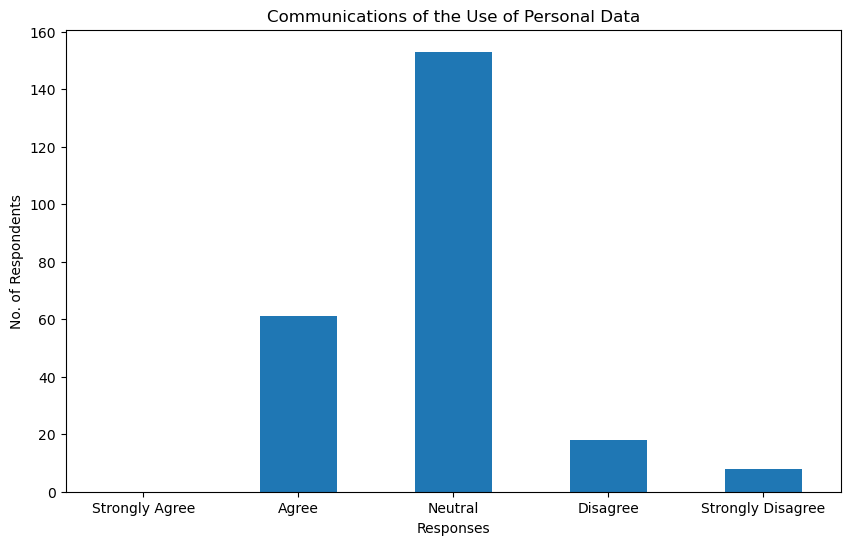

In [229]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'Do you feel that smart applications in Coquitlam clearly communicate how your personal data will be used?'
respond_counts = df[r].value_counts()
respond = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']
# Not_Comfortable = respond_counts['Not Comfortable']
# Slightly_Comfortable  = respond_counts['Slightly Comfortable']
# Neutral = respond_counts['Neutral']
# Comfortable = respond_counts['Comfortable']
# Very_Comfortable = respond_counts['Very Comfortable']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Communications of the Use of Personal Data')
plt.xlabel('Responses')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

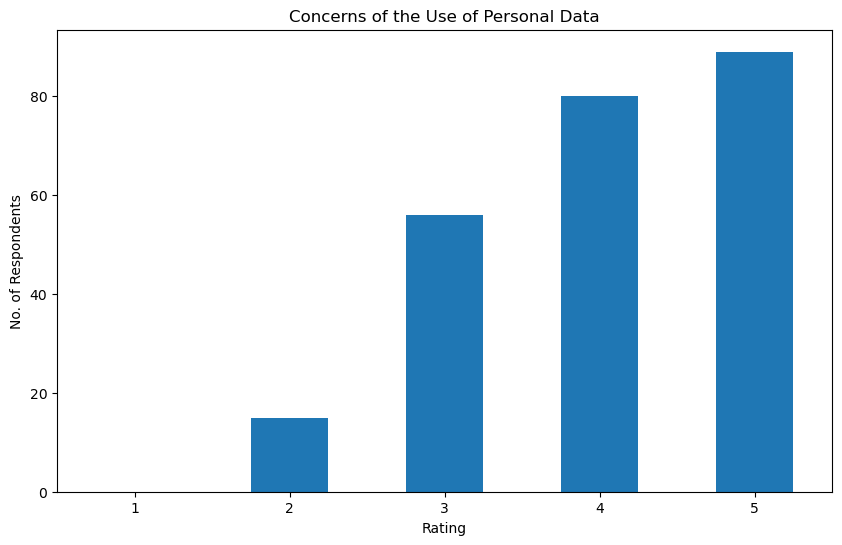

In [228]:
r = df.iloc[:, 24]
r = r.fillna(0)
r = r[r != 0]
r = r.astype(int)
respond = [1,2,3,4,5]
respond_counts = r.value_counts().reindex(respond, fill_value=0).sort_index()
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Concerns of the Use of Personal Data')
plt.xlabel('Rating')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

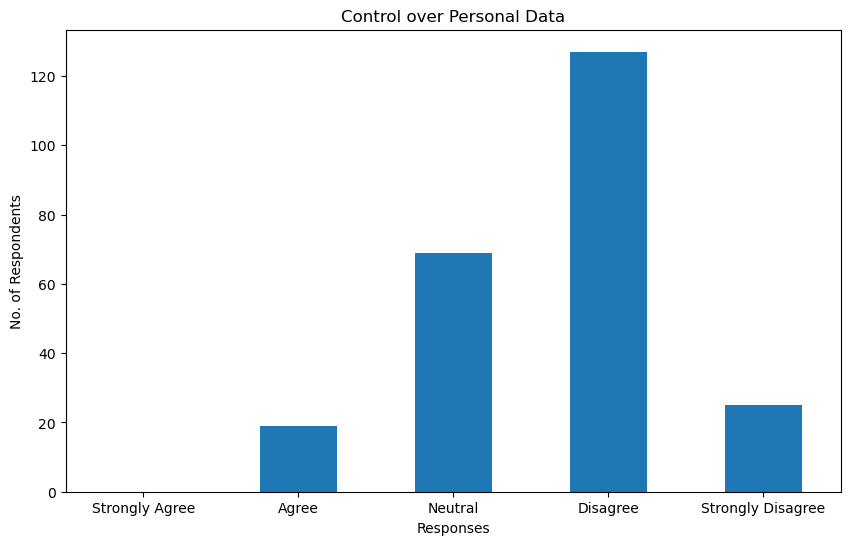

In [227]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'Do you feel you have enough control over the personal data that smart applications collect from you?'
respond_counts = df[r].value_counts()
respond = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Control over Personal Data')
plt.xlabel('Responses')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

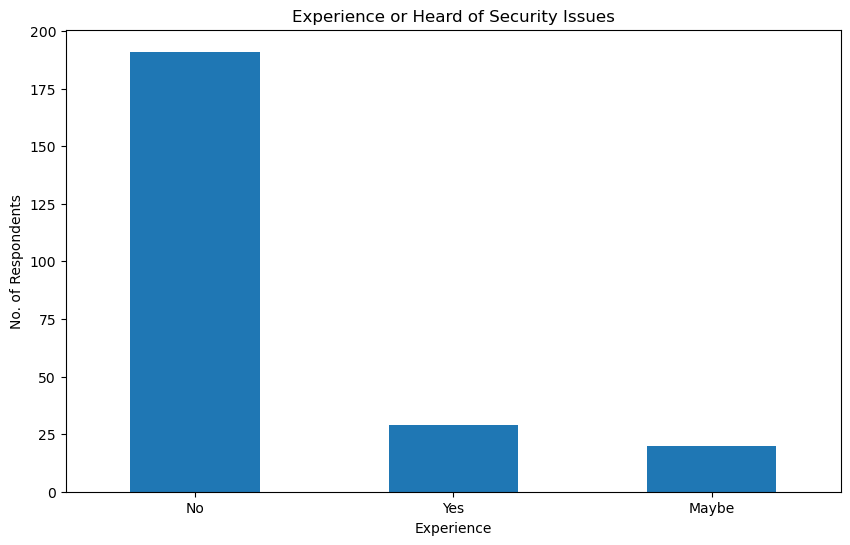

In [226]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'Have you ever experienced or heard of a security issue related to smart applications in Coquitlam?'
respond_counts = df[r].value_counts()
respond = ['Yes', 'No', 'Maybe']
yes = respond_counts['Yes']
no = respond_counts['No']
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Experience or Heard of Security Issues')
plt.xlabel('Experience')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

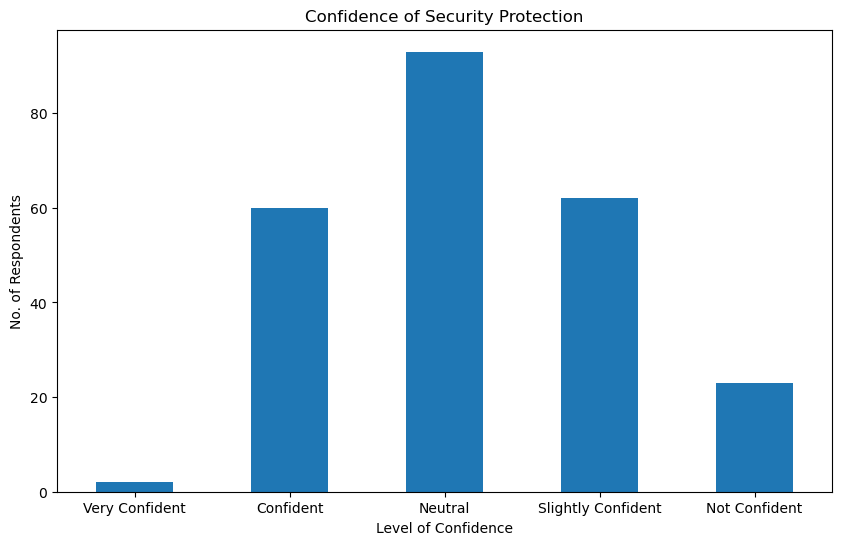

In [225]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'How confident are you that smart applications in Coquitlam have adequate measures in place to protect your data from breaches?'
respond_counts = df[r].value_counts()
respond = ['Very Confident', 'Confident', 'Neutral', 'Slightly Confident', 'Not Confident']
# Not_Comfortable = respond_counts['Not Comfortable']
# Slightly_Comfortable  = respond_counts['Slightly Comfortable']
# Neutral = respond_counts['Neutral']
# Comfortable = respond_counts['Comfortable']
# Very_Comfortable = respond_counts['Very Comfortable']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Confidence of Security Protection')
plt.xlabel('Level of Confidence')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

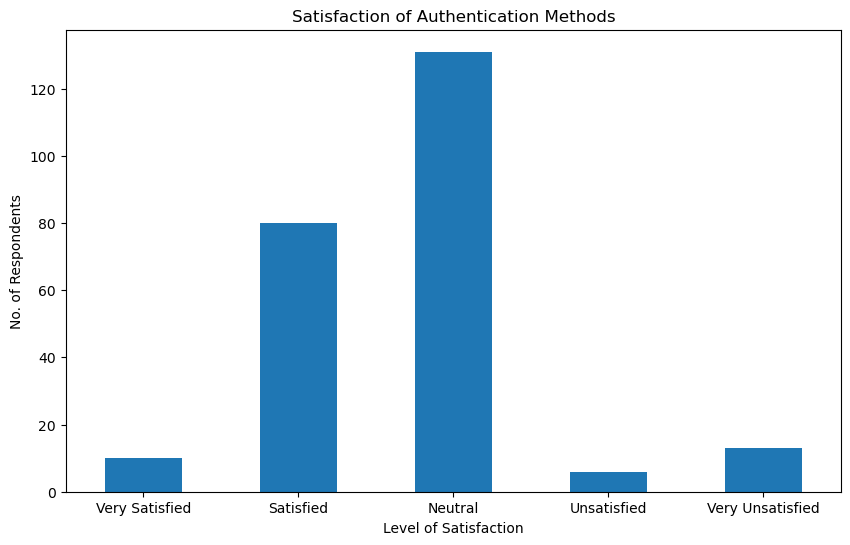

In [224]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'Are you satisfied with the authentication methods used by smart applications to verify your identity?'
respond_counts = df[r].value_counts()
respond = ['Very Satisfied', 'Satisfied', 'Neutral', 'Unsatisfied', 'Very Unsatisfied']
# Not_Comfortable = respond_counts['Not Comfortable']
# Slightly_Comfortable  = respond_counts['Slightly Comfortable']
# Neutral = respond_counts['Neutral']
# Comfortable = respond_counts['Comfortable']
# Very_Comfortable = respond_counts['Very Comfortable']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Satisfaction of Authentication Methods')
plt.xlabel('Level of Satisfaction')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

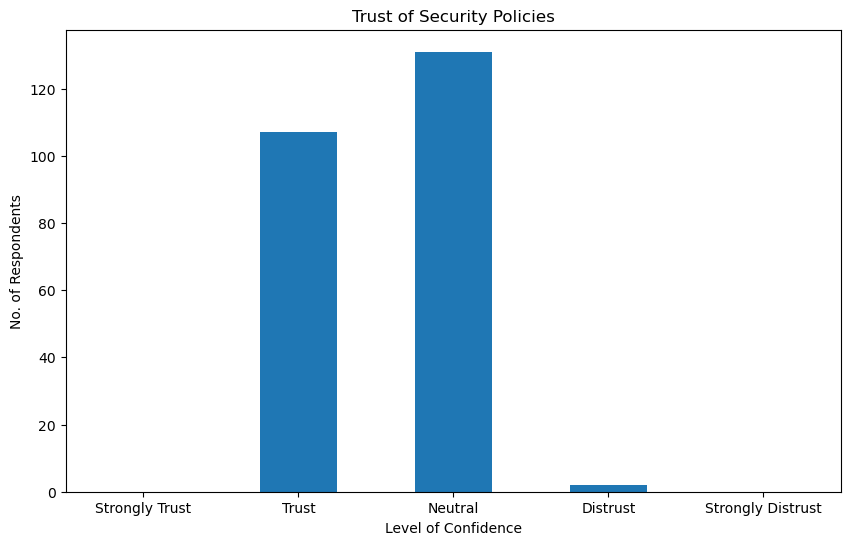

In [235]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'Do you trust the security policies of smart applications in Coquitlam?'
respond_counts = df[r].value_counts()
respond = ['Strongly Trust', 'Trust', 'Neutral', 'Distrust', 'Strongly Distrust']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Trust of Security Policies')
plt.xlabel('Level of Confidence')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

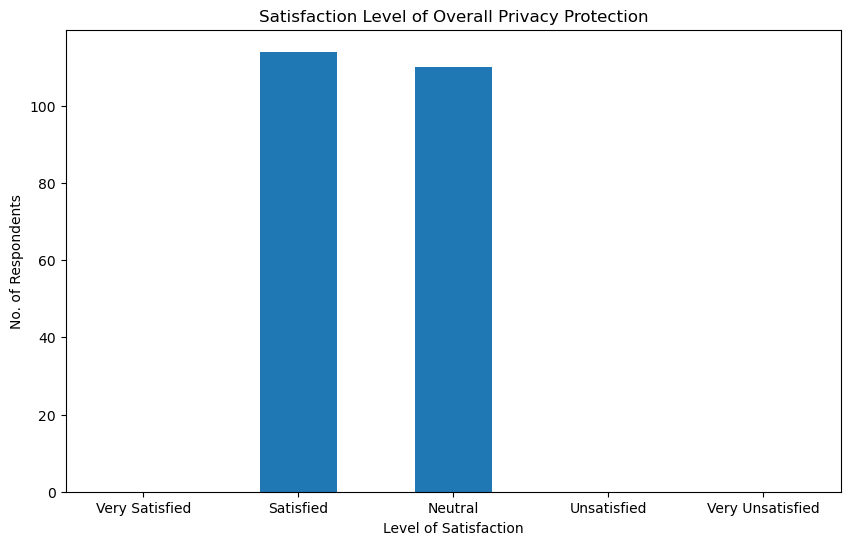

In [222]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'How satisfied are you with the overall privacy protection provided by smart applications in Coquitlam?'
respond_counts = df[r].value_counts()
respond = ['Very Satisfied', 'Satisfied', 'Neutral', 'Unsatisfied', 'Very Unsatisfied']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Satisfaction Level of Overall Privacy Protection')
plt.xlabel('Level of Satisfaction')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

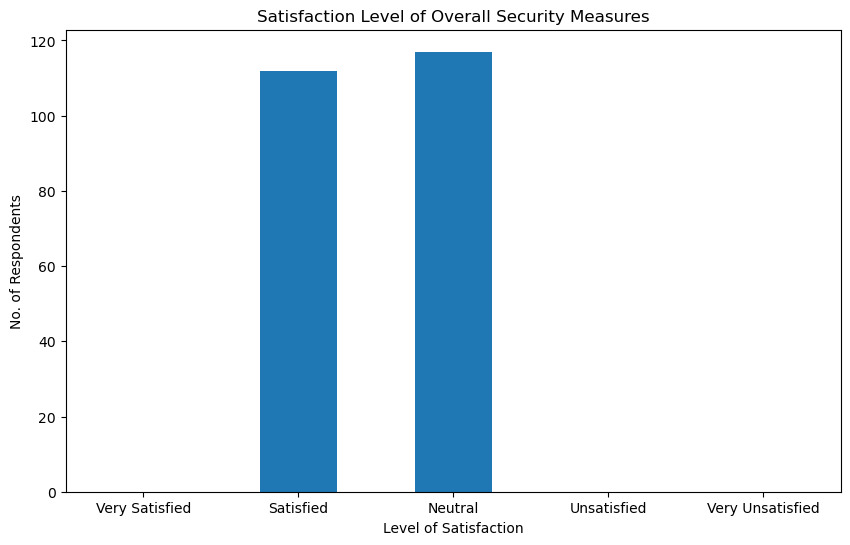

In [236]:
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=False)
r = 'How satisfied are you with the overall security measures implemented by smart applications in Coquitlam?'
respond_counts = df[r].value_counts()
respond = ['Very Satisfied', 'Satisfied', 'Neutral', 'Unsatisfied', 'Very Unsatisfied']
respond_counts = respond_counts.reindex(respond, fill_value=0)
plt.figure(figsize=(10,6))
respond_counts.plot(kind='bar')

plt.title('Satisfaction Level of Overall Security Measures')
plt.xlabel('Level of Satisfaction')
plt.ylabel('No. of Respondents')
plt.xticks(rotation=0)
plt.show()

Mean rating: 3.7583333333333333
Median rating: 4.0
Mode rating: 5


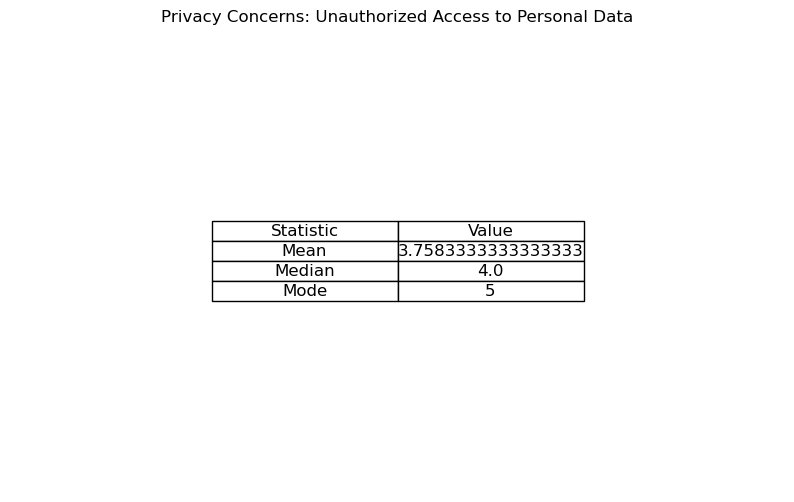

In [247]:
r = df.iloc[:, 15]

# Clean the data: fill NA values with 0, remove rows with 0 ratings, convert to integers
r = r.fillna(0)
r = r[r != 0]
r = r.astype(int)

# Calculate mean, median, and mode
mean_rating = r.mean()
median_rating = r.median()
mode_rating = r.mode()[0]  # mode() returns a Series, take the first mode

# Display the statistics
print(f"Mean rating: {mean_rating}")
print(f"Median rating: {median_rating}")
print(f"Mode rating: {mode_rating}")

# Optionally, you can display these statistics in a simple plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table_data = [
    ["Statistic", "Value"],
    ["Mean", mean_rating],
    ["Median", median_rating],
    ["Mode", mode_rating]
]
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])

# Customize the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Display the table
plt.title('Privacy Concerns: Unauthorized Access to Personal Data')
plt.show()

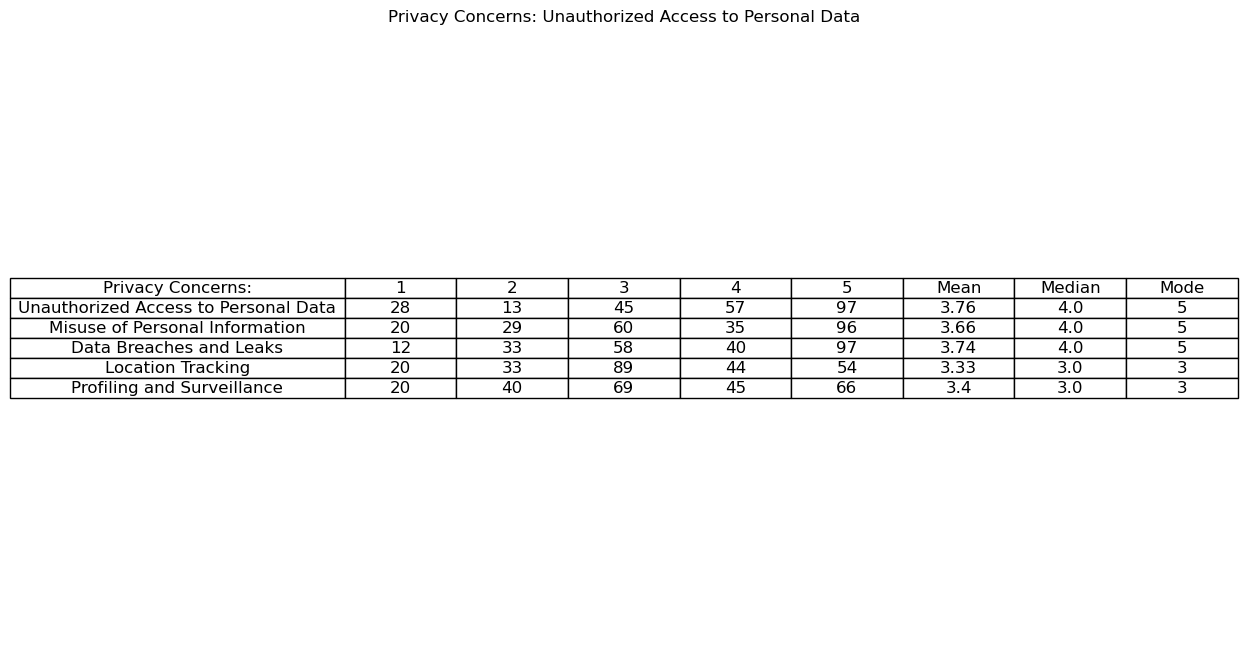

                      Privacy Concerns:   1   2   3   4   5  Mean  Median  \
0  Unauthorized Access to Personal Data  28  13  45  57  97  3.76     4.0   
1        Misuse of Personal Information  20  29  60  35  96  3.66     4.0   
2               Data Breaches and Leaks  12  33  58  40  97  3.74     4.0   
3                     Location Tracking  20  33  89  44  54  3.33     3.0   
4            Profiling and Surveillance  20  40  69  45  66  3.40     3.0   

   Mode  
0     5  
1     5  
2     5  
3     3  
4     3  


In [284]:
# Extract the relevant columns (columns 15 to 19)
columns = df.iloc[:, 15:20]

# Rename the columns
new_column_names = {
    columns.columns[0]: 'Unauthorized Access to Personal Data',
    columns.columns[1]: 'Misuse of Personal Information',
    columns.columns[2]: 'Data Breaches and Leaks',
    columns.columns[3]: 'Location Tracking',
    columns.columns[4]: 'Profiling and Surveillance'
}
columns = columns.rename(columns=new_column_names)

# Clean the data: fill NA values with 0, convert to integers
columns = columns.fillna(0)
columns = columns.astype(int)

# Prepare a list to store the statistics
table_data = [["Privacy Concerns:", "1", "2", "3", "4", "5", "Mean", "Median", "Mode"]]

# Calculate mean, median, mode, and count for each rating (1 to 5) for each column
for col in columns.columns:
    filtered_data = columns[col][columns[col] != 0]
    # Get the count of each rating from 1 to 5
    value_counts = columns[col].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)
    counts = value_counts.tolist()  # Convert to a list
    
    mean_rating = round(filtered_data.mean(), 2) if not filtered_data.empty else 'None'
    median_rating = filtered_data.median() if not filtered_data.empty else 'None'
    
    if not filtered_data.empty:
        mode_rating_series = filtered_data.mode()
        if not mode_rating_series.empty:
            mode_rating = mode_rating_series[0]
        else:
            mode_rating = 'None'
    else:
        mode_rating = 'None'
    
    table_data.append([col] + counts + [mean_rating, median_rating, mode_rating])

# Display the statistics in a table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
colWidths = [0.3] + [0.1]*8
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=colWidths)

# Customize the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Display the table
plt.title('Privacy Concerns: Unauthorized Access to Personal Data')
plt.show()

# Print the statistics for easier reading
print(pd.DataFrame(table_data[1:], columns=table_data[0]))

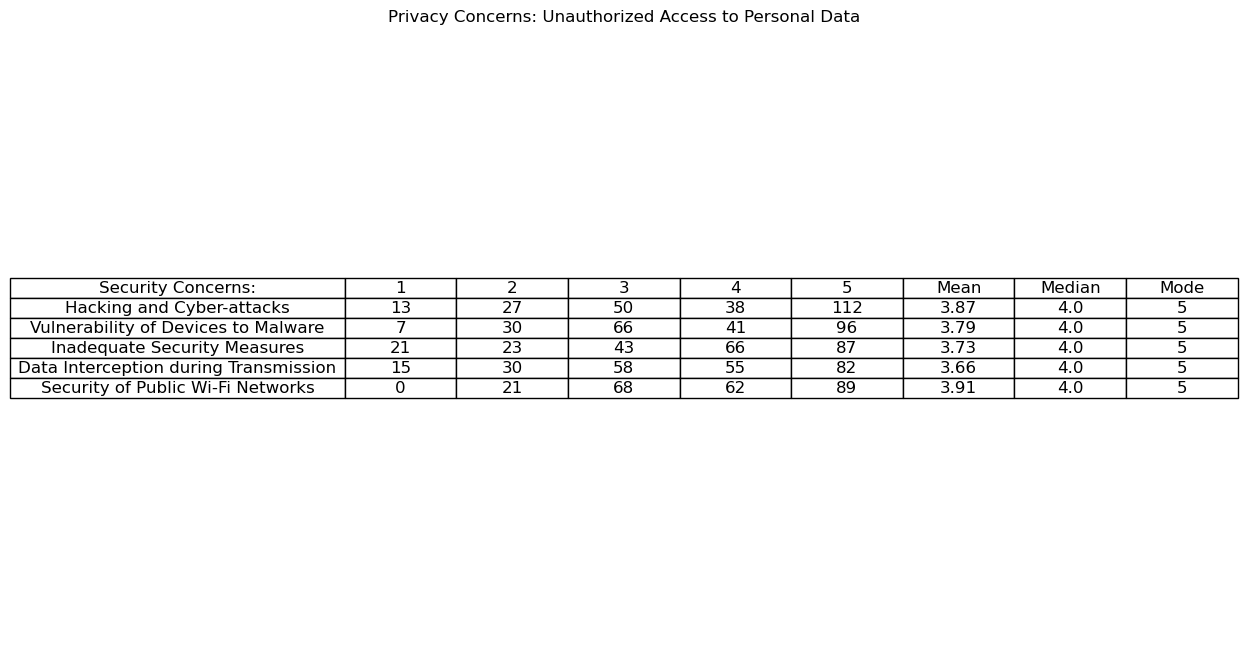

                      Security Concerns:   1   2   3   4    5  Mean  Median  \
0              Hacking and Cyber-attacks  13  27  50  38  112  3.87     4.0   
1    Vulnerability of Devices to Malware   7  30  66  41   96  3.79     4.0   
2           Inadequate Security Measures  21  23  43  66   87  3.73     4.0   
3  Data Interception during Transmission  15  30  58  55   82  3.66     4.0   
4      Security of Public Wi-Fi Networks   0  21  68  62   89  3.91     4.0   

   Mode  
0     5  
1     5  
2     5  
3     5  
4     5  


In [287]:
# Extract the relevant columns (columns 26 to 31)
columns = df.iloc[:, 26:31]

# Rename the columns
new_column_names = {
    columns.columns[0]: 'Hacking and Cyber-attacks',
    columns.columns[1]: 'Vulnerability of Devices to Malware',
    columns.columns[2]: 'Inadequate Security Measures',
    columns.columns[3]: 'Data Interception during Transmission',
    columns.columns[4]: 'Security of Public Wi-Fi Networks'
}
columns = columns.rename(columns=new_column_names)

# Clean the data: fill NA values with 0, convert to integers
columns = columns.fillna(0)
columns = columns.astype(int)

# Prepare a list to store the statistics
table_data = [["Security Concerns:", "1", "2", "3", "4", "5", "Mean", "Median", "Mode"]]

# Calculate mean, median, mode, and count for each rating (1 to 5) for each column
for col in columns.columns:
    filtered_data = columns[col][columns[col] != 0]
    # Get the count of each rating from 1 to 5
    value_counts = columns[col].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)
    counts = value_counts.tolist()  # Convert to a list
    
    mean_rating = round(filtered_data.mean(), 2) if not filtered_data.empty else 'None'
    median_rating = filtered_data.median() if not filtered_data.empty else 'None'
    
    if not filtered_data.empty:
        mode_rating_series = filtered_data.mode()
        if not mode_rating_series.empty:
            mode_rating = mode_rating_series[0]
        else:
            mode_rating = 'None'
    else:
        mode_rating = 'None'
    
    table_data.append([col] + counts + [mean_rating, median_rating, mode_rating])

# Display the statistics in a table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
colWidths = [0.3] + [0.1]*8
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=colWidths)

# Customize the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Display the table
plt.title('Privacy Concerns: Unauthorized Access to Personal Data')
plt.show()

# Print the statistics for easier reading
print(pd.DataFrame(table_data[1:], columns=table_data[0]))